Breast Cancer Prediction

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to a DataFrame for exploration
cancer_df = pd.DataFrame(X, columns=data.feature_names)
cancer_df['Target'] = y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<ipython-input-4-a8c6ed9de789>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=cancer_df, palette='coolwarm')


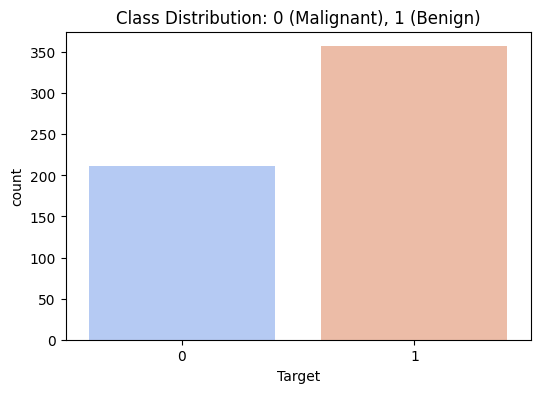

In [4]:
# Step 3: Explore the Data
print("Dataset Info:\n", cancer_df.info())
print("\nFirst 5 Rows:\n", cancer_df.head())
print("\nClass Distribution:\n", cancer_df['Target'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=cancer_df, palette='coolwarm')
plt.title("Class Distribution: 0 (Malignant), 1 (Benign)")
plt.show()

In [5]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train the Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



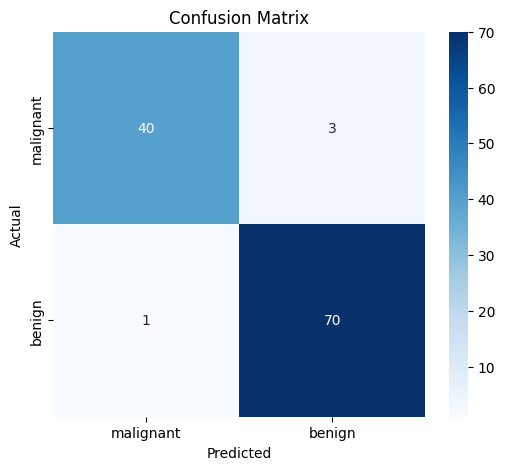

In [7]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# Step 7: Make Predictions
sample = X_test[:5]  # Take first 5 samples from test data
true_labels = y_test[:5]
predicted_labels = model.predict(sample)

print("True Labels:", true_labels)
print("Predicted Labels:", predicted_labels)

True Labels: [1 0 0 1 1]
Predicted Labels: [1 0 0 1 1]
